In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('BNB2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 7:3
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 48.64764486024975
MAPE: 15.28394938845739
MSE: 2366.593350448984


Giá trị RMSE khoảng 48.65 cho thấy sai số trung bình của mô hình đã giảm đáng kể so với mô hình chia train-test 8:2 (80.6). Điều này cho thấy mô hình đã có sự cải thiện rõ rệt về độ chính xác khi dữ liệu được chia theo tỉ lệ 7:3. Đây là một dấu hiệu tích cực cho thấy mô hình dự báo chính xác hơn.

Giá trị MAPE khoảng 15.28% cho thấy tỷ lệ sai số trung bình tuyệt đối của mô hình đã giảm so với giá trị trước đó (26.6%). Với MAPE dưới 20%, mô hình này được coi là khá tốt và đáng tin cậy cho việc dự báo. Điều này cho thấy mô hình Holt-Winters hiện tại đang hoạt động hiệu quả hơn.

Giá trị MSE khoảng 2366 cho thấy trung bình bình phương sai số của mô hình cũng đã giảm đáng kể so với giá trị trước đó (6496). Điều này xác nhận rằng mô hình đã được cải thiện về mặt độ chính xác và sai số dự báo đã được giảm thiểu.

### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    292.352319
1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
1820    296.497206
1821    302.649253
1822    300.608568
1823    296.985328
1824    294.469003
1825    302.469112
1826    317.358020
1827    314.266229
1828    313.405267
1829    304.594723
1830    307.111029
1831    305.354135
1832    310.194430
1833    309.972791
1834    326.367594
1835    317.885349
1836    320.912067
1837    312.984662
1838    313.926132
1839    314.068641
1840    311.717142
1841    315.948156
1842    320.839737
1843    320.464711
1844    322.233932
1845    320.004005
dtype: float64


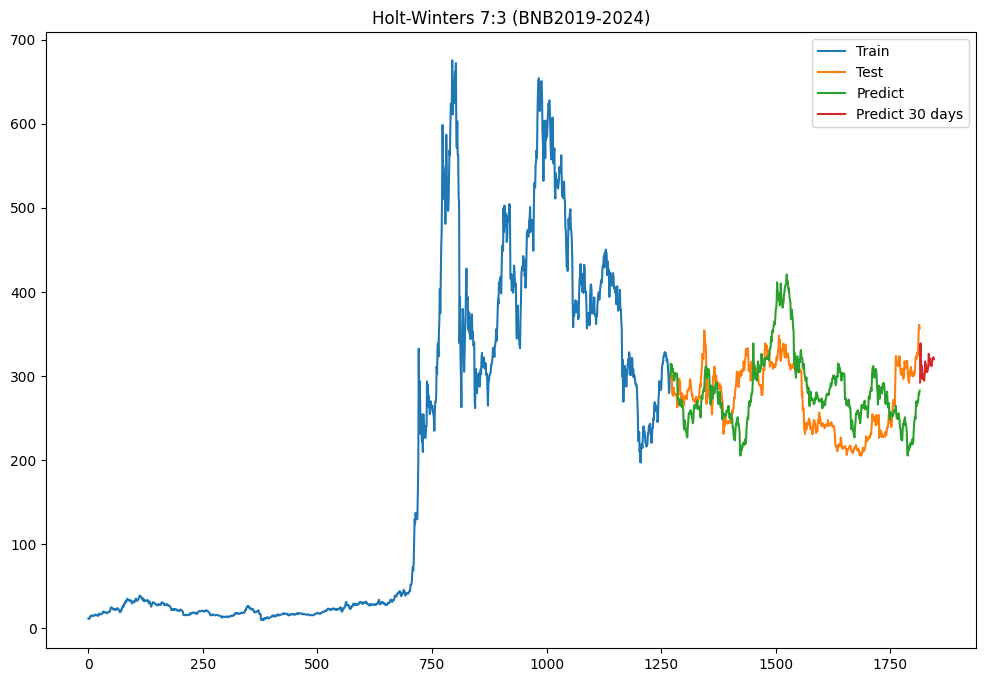

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    292.352319
1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
           ...    
1871    398.372984
1872    390.407607
1873    390.910305
1874    384.088933
1875    391.255523
Length: 61, dtype: float64


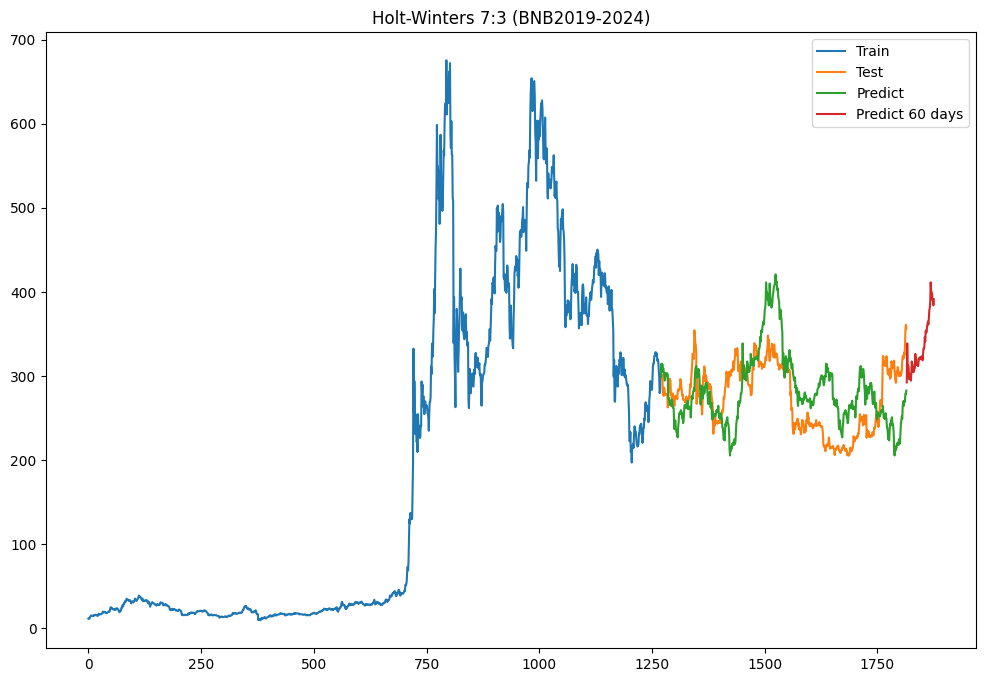

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    292.352319
1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
           ...    
1901    372.051286
1902    368.071993
1903    357.887418
1904    352.315399
1905    314.720001
Length: 91, dtype: float64


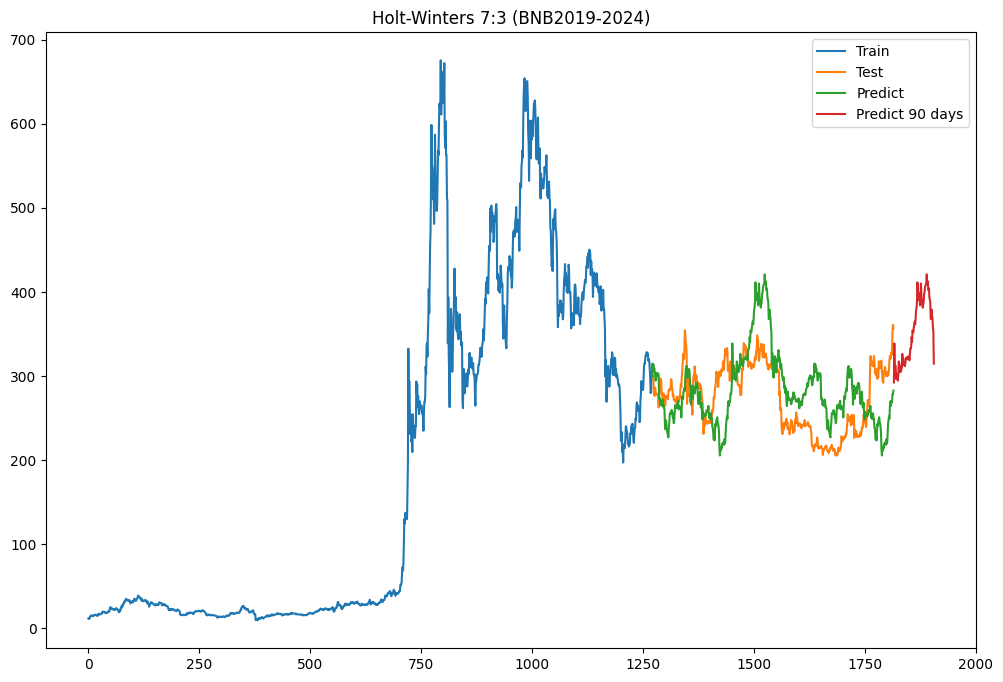

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

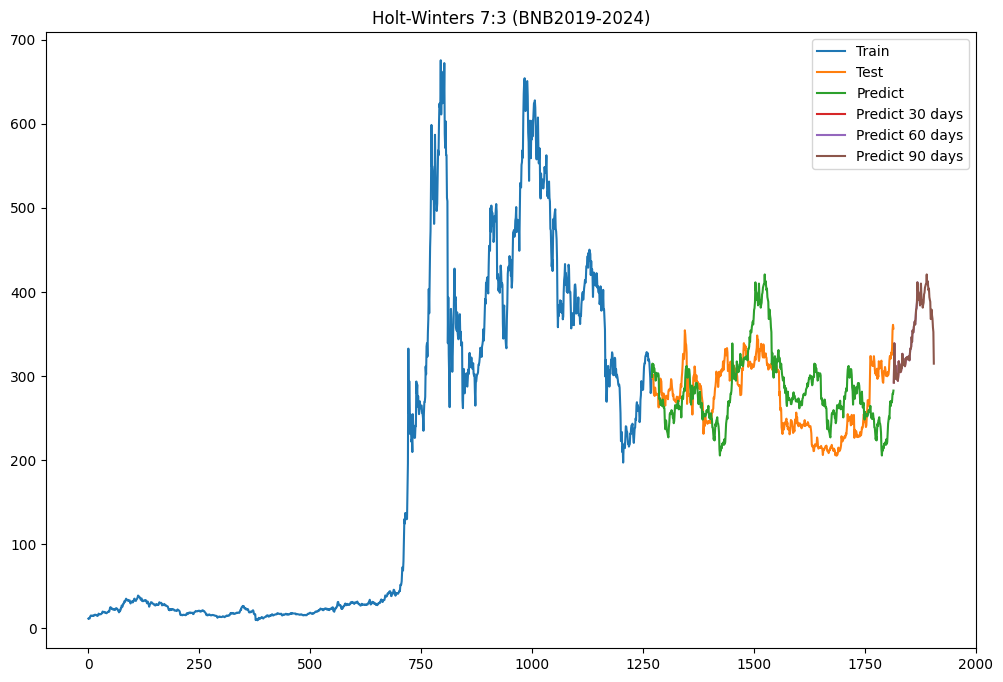

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()